<a href="https://colab.research.google.com/github/jisazac/pythonfinanzaseafit/blob/master/Clase_6_google.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



<p><img alt="Colaboratory logo" height="140px" src="https://upload.wikimedia.org/wikipedia/commons/b/bf/EAFIT-2015.png" align="left" hspace="10px" vspace="0px"></p>

<h1> Diplomado Python para Finanzas</h1>




<p><a name="contents"></a></p>

# Contenido Clase 5


- <a href="#var">1. Value at Risk</a><br>
- <a href="#backtesting">2. BackTesting Estrategias de Trading</a><br>
- <a href="#interes">3. Modelos de Tasas de Interés</a><br>
- <a href="#risk">4. Riesgo de Concentración de Posiciones</a><br>
- <a href="#beta">5. Beta Hedging</a><br>
- <a href="#factors">6. Model Factors</a><br>




<p><a name="var"></a></p>

# 1.0 Value at Risk (VaR)
[[Contenidos]](#contents)

Tambien conocido como valor en riesgo es una medida de riesgo  equivalente  a la **miníma** pérdida  posible  en cierto porcentaje del tiempo a lo largo de un periodo de tiempo,  dadas unas condiciones de mercado asumidas.  Veamos este ejemplo para aclarar el concepto:


*El VaR de 5% de un portafolio es $2.2 millones para un periodo día a día*

Los siguientes puntos son importantes para entender el VaR:

* El VaR puede ser medido tanto en un unidades monetarias como en términos porcentuales.

* El VaR es un pérdida minima. A veces suele decirse que el VaR es la máxima pérdida posible, lo cual es errado ya que lo máximo que puedo perder es el portafolio completo.

* El VaR hace referencia a un horizonte de tiempo, se espera que las pérdidas ocurran  a lo largo de un período de tiempo dado.


Otra forma de expresar el VaR sería:

*5% de las veces las pérdidas van a ser al menos $2.2 millones*

<p><img alt="comparison  logo" width="450" height="280" src="https://www.bmeclearing.es/images/imgsSubidas/Gestion-Riesgo/Hvar_eng.png"
" align="center" hspace="10px" vspace="0px"></p>

Matemáticamente podemos enunciarlo como

$P(R_{t} \leq VaR_{\alpha})=\alpha$

$VaR_{\alpha}=Cuantil_{a}(R_{t})$

### Ejercicio 1

Dado un VaR de 25 millones al 5% para un mes, cual de las siguientes afirmaciones es correcta:

1. Hay un 5% de probabilidad perder 25 millone en un mes.

2. La minima pérdida que podría ocurrir en un mes 5% de las veces es 25 millones.

3. Hay un 95% de probabilidad que el valor esperado de la pérdida durante un mes sea menor a 25 millones.




De click **aquí** para ver la respuesta.

<!---
# No esperaba verte tan rápido aquí :(

La respuesta correcta es (2). (1) es incorrecta porque el VaR no da la probabilidad de perder una cifra específica. (3) Es incorrecto porque el VaR no es un valor "esperado" (promedio) sino una pérdida mínima   

--->

### 1.1. Ventajas del VaR

- Concepto Simple
- Fácil de comunicar
- Permite hacer comparaciones de riesgo
- Ampliamente aceptado por reguladores.

### 1.2. Limitaciones del VaR

- Subestima la frecuencia de eventos extremos
- No toma en cuenta la liquidez del portafolio (la iliquidez puede exacerbar las pérdidas)
- Vulnerable a regímenes de volatilidad
- Malentendidos: El VaR no es una medida de peor escenario, las pérdidas pueden exceder el VaR.

### 1.3. Estimación paramétrica del VaR (método varianza-covarianza) 

También conocido como el método analítico comienza con una descomposición de riesgo de los componentes del portafolio. Típicamente asume la distribución normal. Solo requiere como insumos:

- El retorno esperado de los componentes
- La desviación estandar de cada componente.

Para lograrlo usaremos el concepto de distribución normal estándar $z$. Si tenemos un serie de retornos $R$ podemos convertirla a su distribución $z$ equivalente con la transformación:

$$ z=\frac{R-\mu}{\sigma}$$

Así, la fórmula en forma cerrada del VaR Normal sería:

$$VaR_{\alpha}(R) = \mu - \sigma N^{-1}(\alpha)$$


In [ ]:
!pip install yfinance

In [ ]:
#Calculo del VaR para un solo activo

#Importamos las librerias necesarias
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt
from matplotlib import mlab
import datetime as dt
from matplotlib import style
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader as web
from scipy.stats import norm
import yfinance as yf

#Descargamos la data para la acción de Google en las siguientes fechas
df = yf.download('GOOG', '2010-01-01','2019-01-31')
print("-----------------------------------------------")
print("Data para Google proveniente de Yahoo Finance")
#Conservamos solo el precio de cierre
df = df[['Close']]
print(df.head(3))

#Calculamos los retornos
df['returns'] = df.Close.pct_change()

# Usamos numpy para calcular el retorno diario esperado
mean = np.mean(df['returns'])
#Usamos numpy para calcular desviación estandar de los retornos diarios
std_dev = np.std(df['returns'])
df['returns'].hist(bins=40, histtype='stepfilled', alpha=0.5)
plt.title("Distribución retornos Google")
plt.show()

#Calculamos el VaR con el inverso de la función
# de densidad acumulada normal usando el metodo
# ppf() "percentil point function"
VaR_10 = norm.ppf(1-0.9, mean, std_dev)
VaR_5 = norm.ppf(1-0.95, mean, std_dev)
VaR_1 = norm.ppf(1-0.99, mean, std_dev)

print('VaR 10%  (90% Confidence level):   ', VaR_10)
print('VaR 5% (95% Confidence Level):   ', VaR_5)
print('VaR 1% (99% Confidence Level):   ', VaR_1)


El ejemplo calcula el VaR a un día, cómo podemos extender el resultado a un periodo de tiempo más amplio partiendo de los retornos diarios? Asuma un portafolio con valor de 30 millones.


Esto podemos lograrlo multiplicando el VaR a un día por la raíz cuadrada del número de días que queremos extenderlo

In [ ]:
# Calcular el VaR n-dias
var_array = []
num_days = int(30)
for x in range(1, num_days+1):    
    z=var_array.append(np.round(VaR_5 * np.sqrt(x)*-1*30,2))
    if x%5==0:
      print(str(x) + " dia VaR @ 5%: " + str(np.round(VaR_5 * np.sqrt(x)*-1*30,2)))

# Gráfica
plt.xlabel("Dia #")
plt.ylabel("Maxima perdida del portafolio")
plt.title( "VaR en periodo de 30 días")
plt.plot(var_array, "r")

### Ejercicio 2

Partiendo desde la misma fecha inicial del ejercicio anterior, añada información de la acción de Google hasta el día de ayer. Luego calcule el VaR 1% , VaR 5% y VaR 10%. Ha aumentado el riesgo del activo al incluir las observaciones de este año?


In [ ]:
#Desarrolle aqui su ejercicio


De click **aquí** para ver la respuesta.

<!---
# No esperaba verte tan rápido aquí :(

#Importamos las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import mlab
import datetime as dt
from matplotlib import style
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader as web
from scipy.stats import norm
import fix_yahoo_finance as yf

#Descargamos la data para la acción de Google en las siguientes fechas
df = yf.download('GOOG', '2010-01-01','2020-09-17')
print("-----------------------------------------------")
print("Data para Google proveniente de Yahoo Finance")
#Conservamos solo el precio de cierre
df = df[['Close']]
print(df.head(3))

#Calculamos los retornos
df['returns'] = df.Close.pct_change()

# Usamos numpy para calcular el retorno diario esperado
mean = np.mean(df['returns'])
#Usamos numpy para calcular desviación estandar de los retornos diarios
std_dev = np.std(df['returns'])
df['returns'].hist(bins=40, histtype='stepfilled', alpha=0.5)
plt.title("Distribución retornos Google")
plt.show()

#Calculamos el VaR con el inverso de la función
# de densidad acumulada normal usando el metodo
# ppf() "percentil point function"
VaR_90 = norm.ppf(1-0.9, mean, std_dev)
VaR_95 = norm.ppf(1-0.95, mean, std_dev)
VaR_99 = norm.ppf(1-0.99, mean, std_dev)

print('VaR 10%  (90% Confidence level):   ', VaR_90)
print('VaR 5% (95% Confidence Level):   ', VaR_95)
print('VaR 1% (99% Confidence Level):   ', VaR_99)

--->

### Ejercicio 3

Asuma un portafolio con retorno esperado de 0.0384% y una desviación estandar de 0.9960%, cuál de los siguientes valores se aproxima mas a un VaR del 1% para un portafolio de 300 millones de COP.

a) 6.8 millones COP

b) 4.8 millones COP

c) 2.8 millones COP


In [ ]:
#Desarrolle aqui su ejercicio


### 1.4. VaR histórico (No paramétrico)

Simulemos a partir de una distribución normal los retornos de 10 activos hipotéticos



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# mu = 0.01, std = 0.10, 1000 dias, 10 activos
mu = 0.01
sigma = 0.10
dias = 1000
num_assets = 10

returns = np.random.normal(mu, sigma, (dias, num_assets))

# Nombres Hipoteticos
names = ['Asset %s' %i  for i in range(num_assets)]

# Metemos los retornos en un dataframe
returns = pd.DataFrame(returns, columns=names)

# Grafica de los 50 primeros dias
plt.plot(returns.head(50))
plt.xlabel('Dias')
plt.ylabel('Retorno')

In [ ]:
weights = np.ones((10, 1))
# Normalizamos los pesos
weights = weights / np.sum(weights)

def value_at_risk(value_invested, returns, weights, alpha=0.05, lookback_days=520):
    returns = returns.fillna(0.0)
    # Multiplicamos los retornos en la ventana seleccionada por los pesos para obtener un retorno ponderado
    portfolio_returns = returns.iloc[-lookback_days:].dot(weights)
    # Buscamos el percentil adecuado en el vector de retornos y lo multiplicamos por el valor invertido
    return np.percentile(portfolio_returns, 100 * (alpha)) * value_invested

Calculemos el VaR para $\alpha = 0.05$.

In [ ]:
value_invested = 1000000

value_at_risk(value_invested, returns, weights, alpha=0.05)

Interpretamos este resultado como:  históricamente no más del 5% de los dias resultaron en pérdidas más extremas que este valor.

### 1.5. Conditional Value at Risk (CVaR): ¿Qué pasa si los retornos no son normales?

El CVaR es considerado como una mejora del VaR, ya que toma en cuenta la forma de la distribución de los retornos. También se le conoce como Expected Shortfall, y no es otra cosa que el valor esperado de todas las diferentes pérdidas mayores al VaR.

### Valor esperado (Repaso)

Suponga un dado justo. Cada número es igual de probable. El concepto de valor esperado escrito como $\mathrm{E}(X)$, hace referencia al valor que se obtendría al considerar todos los eventos posibles. Para obtenerlo solo basta multiplicar cada evento por su probabilidad de ocurrencia y luego sumar estos valores,  es decir, estamos ponderando probabilidades:

$$1/6 \times 1 + 1/6 \times 2 + 1/6 \times 3 + 1/6 \times 4 + 1/6 \times 5 + 1/6 \times 6 =  3.5$$

Cuando los posibles resultados son continuos utilizamos la integración. Esta sería la formula del CVar:

$$CVaR_{\alpha}(x) \approx \frac{1}{(1-\alpha)} \int_{f(x,y) \geq VaR_{\alpha}(x)} f(x,y)p(y)dy dx$$

In [ ]:
def cvar(value_invested, returns, weights, alpha=0.05, lookback_days=520):
    # LLamamos a nuestra función de VaR basico
    var = value_at_risk(value_invested, returns, weights, alpha, lookback_days=lookback_days)
    returns = returns.fillna(0.0)
    portfolio_returns = returns.iloc[-lookback_days:].dot(weights)
    
    # Encontramos un ratio en lugar de una perdida monetaria
    var_pct_loss = var / value_invested
    
    #Promediamos luego los retornos menores al var_pct_loss
    return value_invested * np.nanmean(portfolio_returns[portfolio_returns < var_pct_loss])

Comparemos los cálculos para nuestro ejercicio anterior

In [ ]:
cvar(value_invested, returns, weights, lookback_days=500)

In [ ]:
value_at_risk(value_invested, returns, weights, lookback_days=500)

El CVaR es mayor porque captura mas información acerca de la forma de la distribución (momentos). Si las colas tienen más masa va a capturar ese fenómeno



### 1.6. Caso adicional: EWMA

**EWMA (Media Móvil Exponencialmente Ponderada)** es una técnica estadística que se puede utilizar en el análisis de Value at Risk (VaR) para estimar la volatilidad de los rendimientos de un activo a lo largo del tiempo.

Primero, se recolecta los datos históricos de los retornos del activo. Supongamos que deseas estimar el VaR para una cartera de una unica acción. 

Calculamos los log-returns diarios de la accion utilizando la siguiente fórmula:
$log-return_{t} = ln(price_{t}) - ln(price_{t-1})$,


Calculamos la volatilidad diaria de los rendimientos de la acción utilizando EWMA. La fórmula para EWMA es:
$\sigma^{2}_{t} = \lambda \cdot \sigma^{2}_{t-1} + (1-\lambda)(r_{t-1}-\mu)^{2}$,
donde $\sigma^{2}_{t}$ es la estimación de la volatilidad en el momento t, $\lambda$ es el parámetro de decaimiento (una constante entre 0 y 1), $$r_{t-1} es el rendimiento diario en el momento t-1, y $\mu$ es la media de los rendimientos durante el período de tiempo.

Así, podemos calcular la volatilidad anualizada utilizando la siguiente fórmula:
volatilidad anualizada = $\sqrt(252)$*volatilidad diaria

Para calcuñlar  el VaR utilizando la volatilidad anualizada necesitamos a su vez el nivel de confianza deseado. Por ejemplo, si se busca calcular el VaR del 99%, multiplicamos la volatilidad anualizada por 2.33 (el z-score para el percentil 99 de la distribución normal estándar) y luego  ese resultado por el valor de la cartera.



In [16]:
import numpy as np
import pandas as pd
from scipy.stats import norm
#Importamos las librerias necesarias
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt
from matplotlib import mlab
import datetime as dt
from matplotlib import style
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader as web
from scipy.stats import norm
import yfinance as yf

#Descargamos la data para la acción de Google en las siguientes fechas
df = yf.download('GOOG', '2010-01-01','2019-01-31')
print("-----------------------------------------------")
print("Data para Google proveniente de Yahoo Finance")
#Conservamos solo el precio de cierre
returns_df = df[['Close']].reset_index()
print(df.head(3))

# Set the decay parameter lambda
lambda_param = 0.94

# Calculate the daily log-returns
returns_df['log_returns'] = np.log(returns_df['Close']) - np.log(returns_df['Close'].shift(1))
returns_df=returns_df.dropna()
# Calculate the mean of the returns
mu = returns_df['log_returns'].mean()

# Initialize the volatility estimate
returns_df['volatility'] = 0.0

# Calculate the daily volatility using EWMA
for i in range(2, len(returns_df)):
    returns_df.loc[i, 'volatility'] = np.sqrt(lambda_param * returns_df.loc[i-1, 'volatility']**2 + (1-lambda_param) * (returns_df.loc[i-1, 'log_returns'] - mu)**2)

# Calculate the annualized volatility
annualized_volatility = np.sqrt(252) * returns_df['volatility'].iloc[-2]

# Calculate the VaR at the 99% confidence level
z_score = norm.ppf(0.99)
portfolio_value = 1000000
VaR = portfolio_value * annualized_volatility * z_score

print("The estimated VaR at the 99% confidence level is:", VaR)


[*********************100%***********************]  1 of 1 completed
-----------------------------------------------
Data para Google proveniente de Yahoo Finance
                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2010-01-04  15.615220  15.678981  15.547723  15.610239  15.610239   78541293
2010-01-05  15.620949  15.637387  15.480475  15.541497  15.541497  120638494
2010-01-06  15.588072  15.588072  15.102393  15.149715  15.149715  159744526
The estimated VaR at the 99% confidence level is: 715561.5314118258


# 2.0 Backtesting de  estrategias de Trading
<p><a name="backtesting"></a></p>

[[Contenidos]](#contents)

Podemos definir al Backtesting como el método general para ver que tan bien se desempeña una estrategia o modelo desde una perspectiva ex-post. El Backtesting permite ademas valorar la viabilidad de una estrategia de trading al descubrir cómo le hubiese ido usando data histórica. Si un  backtesting funciona, los traders y analistas pueden tener  confianza para implementar la estrategia  analizada.


## 2.1 Death Cross and Golden Cross 

<p><img alt="comparison  logo" width="450" height="280" src="https://www.investopedia.com/thmb/LilaVqIIg0eWGiqKbj6Bf9pYcss=/1575x0/filters:no_upscale():max_bytes(150000):strip_icc():format(webp)/2018-12-14-DeathCross-5c13eaf0c9e77c00013499e4.png"
" align="center" hspace="10px" vspace="0px"></p>

Un "Death Cross" occurre cuando la media móvil de 50 días de un indice o acción cae por debajo de su media móvil de 200 días, esto suele conllevar un retroceso en la tendencia de largo plazo para el activo. Veamos un ejemplo de como evaluar una estrategia de trading basada en esta señal para invertir.



In [17]:
#Importamos las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import yfinance as yf
from pandas_datareader import data
tickers = ['^GSPC']

# We would like all available data from 01/01/2000 until 12/31/2016.
start_date = '2007-01-01'
end_date = '2023-03-13'

# User pandas_reader.data.DataReader to load the desired data. As simple as that.
#spy = data.DataReader('^GSPC', 'yahoo', start_date, end_date)
#Descargamos la data del SP500 utilizando Yahoo Finance las siguientes fechas
spy = yf.download('^GSPC', '2007-01-01','2023-03-13')
spy_bol=spy[["Close"]].copy()
spy_macd=spy[["Close"]].copy()

[*********************100%***********************]  1 of 1 completed


In [18]:
#Tomamos solamente el precio de cierre
spy=spy[["Close"]]

# Calculamos diferentes medias moviles para el SPX 
spy["ma_50"]=spy.Close.rolling(window=50).mean()
spy["ma_200"]=spy.Close.rolling(window=200).mean()



#Usamos plotly para graficar nuestras series
import plotly.graph_objects as go


fig = go.Figure()
fig.add_trace(go.Scatter(x=spy.index, y=spy.Close,
                    name='SP500'))
fig.add_trace(go.Scatter(x=spy.index, y=spy.ma_50,
                      name='MA 50'))
fig.add_trace(go.Scatter(x=spy.index, y=spy.ma_200,
                      name='MA 200'))
fig.update_layout(title='SP500 - DEATH CROSS',yaxis_title="Precio")
fig.show()


C:\Users\juani\AppData\Local\Temp/ipykernel_1684/2041404974.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spy["ma_50"]=spy.Close.rolling(window=50).mean()
C:\Users\juani\AppData\Local\Temp/ipykernel_1684/2041404974.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spy["ma_200"]=spy.Close.rolling(window=200).mean()


ModuleNotFoundError: No module named 'plotly'

In [ ]:
#Eliminamos aquellas fechas con NaN
spy=spy.dropna()

#Creamos nuestra señal para el death crossing
# con la siguiente interpretación:
# Signal= 1 , Long Position, Expuestos de forma positiva y directa al activo
# Signal= -1, Short Position, Expuestas de forma negativa al activo


spy['Signal'] = spy.apply(lambda row: 1 if row['ma_50'] > row['ma_200']  else -1, axis=1)

#Calculamos el retorno del SP500  
spy["return"]=spy.Close.pct_change()
# Calculamos el retorno acumulado de nuestra linea base: Buy And Hold
spy["BuyAndHold"]=spy["return"].cumsum()

#Calculamos el retorno acumulado de nuestra estrategia Long-Short con el death crossing
spy["Strategy"]=spy["return"]*spy["Signal"]
spy["Strategy_cum"]=spy["Strategy"].cumsum()


In [ ]:
import plotly.graph_objects as go

# Create random data with numpy
fig = go.Figure()

# Add traces
fig.add_trace(go.Scatter(x=spy.index, y=spy.BuyAndHold,
                    name='Buy And Hold'))
fig.add_trace(go.Scatter(x=spy.index, y=spy.Strategy_cum,
                      name='Strategy'))
fig.update_layout(title='Desempeño Estrategia',yaxis_title="Retorno Acumulado")

fig.show()

## 2.2 Bandas de Bollinger

Las bandas de bollinger son un indicador de volatilidad que consta de un promedio móvil y dos desviaciones estándar trazadas arriba y abajo del promedio móvil. Cuando el precio se mueve fuera de la banda superior o inferior, puede indicar una posible reversión en la dirección. Las señales de compra se generan cuando el precio cae por debajo de la banda inferior y luego sube por encima de ella, y las señales de venta se generan cuando el precio sube por encima de la banda superior y luego cae por debajo de ella.

<p><img alt="bollinger" width="450" height="280" src="BollingerBandsESbasics.png"
" align="center" hspace="10px" vspace="0px"></p>

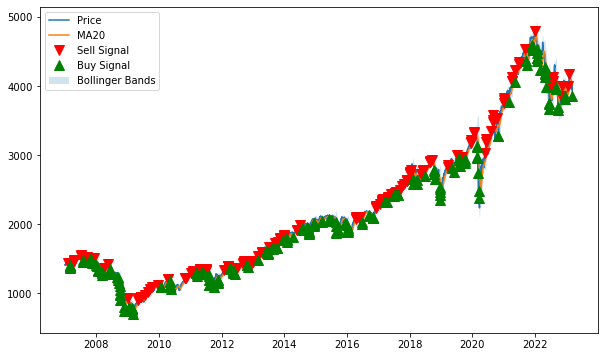

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Create sample DataFrame
df = spy_bol.copy()
df["Date"]=df.index

# Calculate 20-day rolling mean and standard deviation
df['MA20'] = df['Close'].rolling(window=20).mean()
df['STD20'] = df['Close'].rolling(window=20).std()

# Calculate upper and lower bands
df['UpperBand'] = df['MA20'] + 2 * df['STD20']
df['LowerBand'] = df['MA20'] - 2 * df['STD20']

# Create signals based on price crossing upper or lower band
df['Signal'] = None
df.loc[df['Close'] > df['UpperBand'], 'Signal'] = -1
df.loc[df['Close'] < df['LowerBand'], 'Signal'] = 1

# Plot price, bands, and signals
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df['Date'], df['Close'], label='Price')
ax.plot(df['Date'], df['MA20'], label='MA20')
ax.fill_between(df['Date'], df['UpperBand'], df['LowerBand'], alpha=0.2, label='Bollinger Bands')
ax.plot(df.loc[df['Signal'] == -1, 'Date'], df.loc[df['Signal'] == -1, 'Close'], 'rv', markersize=10, label='Sell Signal')
ax.plot(df.loc[df['Signal'] == 1, 'Date'], df.loc[df['Signal'] == 1, 'Close'], 'g^', markersize=10, label='Buy Signal')
ax.legend(loc='best')
plt.show()


## 2.3 MACD

El MACD es un indicador de momento que sigue la tendencia y mide la relación entre dos medias móviles. Cuando la línea del MACD cruza por encima de la línea de señal, se genera una señal de compra, y cuando la línea del MACD cruza por debajo de la línea de señal, se genera una señal de venta.



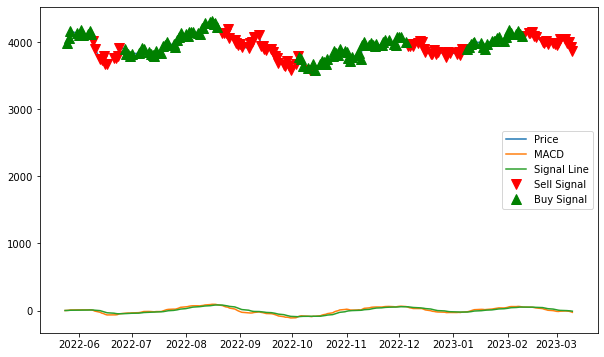

In [15]:
# Create sample DataFrame
df = spy_macd.copy().iloc[-200:]
df["Date"]=df.index

# Calculate 26-day and 12-day exponential moving averages
df['EMA26'] = df['Close'].ewm(span=26).mean()
df['EMA12'] = df['Close'].ewm(span=12).mean()

# Calculate MACD line
df['MACD'] = df['EMA12'] - df['EMA26']

# Calculate 9-day signal line
df['Signal'] = df['MACD'].ewm(span=9).mean()

# Create signals based on MACD line crossing signal line
df['Position'] = None
df.loc[df['MACD'] > df['Signal'], 'Position'] = 1
df.loc[df['MACD'] < df['Signal'], 'Position'] = -1

# Plot price, MACD, signal line, and signals
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df['Date'], df['Close'], label='Price')
ax.plot(df['Date'], df['MACD'], label='MACD')
ax.plot(df['Date'], df['Signal'], label='Signal Line')
ax.plot(df.loc[df['Position'] == -1, 'Date'], df.loc[df['Position'] == -1, 'Close'], 'rv', markersize=10, label='Sell Signal')
ax.plot(df.loc[df['Position'] == 1, 'Date'], df.loc[df['Position'] == 1, 'Close'], 'g^', markersize=10, label='Buy Signal')
ax.legend(loc='best')
plt.show()

## 2.4 Backtesting

Veamos unas metricas que nos permitan comparar la estrategia contra un enfoque de Buy And Hold en el mismo periodo de tiempo:



In [16]:
metricas={}
label={"Strategy":"Strategy","return":"BuyAndHold"}
idx=['volatilidad','Retorno Mensual Promedio',"Ratio Sharpe",'% meses +','+/- ratios meses','trades positivos %',
     'trades negativos %']

for metodo in spy[["Strategy","return"]].columns:
  #Volatilidad Anualizada de la Estrategia
  vol=np.round(spy[metodo].std()*np.sqrt(252)*100,2)
  #Retorno Mensual Promedio de la Estrategia
  avgret=np.round(spy[metodo].groupby(spy.index.strftime('%Y-%m')).sum().mean()*100,2)
  #Ratio de Sharpe
  sharpe=np.round((spy[metodo].mean()/spy[metodo].std())*np.sqrt(252),2)
  # Porcentaje de meses con retornos positivos
  posret=np.round(np.sum(spy[metodo].groupby(spy.index.strftime('%Y-%m')).sum()>0)/
                  len(spy[metodo].groupby(spy.index.strftime('%Y-%m')).sum()),2)
  # Ratio de meses positivos/ meses negativos
  pnratio=np.round(posret/(100-posret),3)
  #trades positivos
  trades_pos=np.round(len(spy.loc[spy[metodo]>0])/len(spy[metodo]),3)
  #trades negativos
  trades_neg=np.round(len(spy.loc[spy[metodo]<0])/len(spy[metodo]),3)

  metricas[label[metodo]]=[vol,avgret,sharpe,posret,pnratio,trades_pos,trades_neg]
dfm=pd.DataFrame(metricas)
dfm["metrica"]=idx


KeyError: "None of [Index(['Strategy', 'return'], dtype='object')] are in the [columns]"

In [ ]:
dfm

### Ejercicio 4: Concurso

Escoja un periodo de tiempo distinto en el cual probar si alguna de las estrategias estudiadas genera resutados distintos (mejores) al compararlo contra el BuyAndHold. Muestre la gráfica de retornos acumulados además de la tabla resumen de métricas.




In [ ]:
#Desarrolle aqui su ejercicio

<p><a name="interes"></a></p>

# 3.0 Modelos de Tasas de Interés

[[Contenidos]](#contents)

A la hora de implementar estrategias en portafolios con activos de renta fija (Deuda Privada, Deuda Pública, Treasuries Americanos, Bunds Alemanes, etc..) hay dos actividades fundamentales que debe realizar: La primera es determinar si los bonos vendidos o comprados estan siendo valorados a un precio justo, la segunda, determinar el desempeño de su portafolio bajo distintos escenarios de tasas de interés. Para ambas actividades se hace útil la aplicación de modelos de tasas de interés.

Los modelos de tasas de interés son una descripción estadistica de como las tasas pueden cambiar en el tiempo


## 3.1. Un proceso estocástico de tiempo continuo básico

Empecemos con un modelo básico para la tasa de interés de corto plazo $r$ utilizando la siguiente especificación:

$$dr=b\cdot dt+\sigma \cdot dz $$

Donde:
+ $r$ : Representa la tasa de interés de corto plazo, por tanto $dr$ denota sus cambios
+ $dz$ : denota un proceso aleatorio
+ $\sigma$ : desviación estándar de los cambios en la tasa de corto plazo (término de volatilidad)
+ $b$ : Dirección esperada del cambio en la tasa (drift)

Antes de continuar la formulación anterior requiere enunciar 3 supuestos:

+ La variable $z$ sigue una distribución normal de media cero y desviación estándar de 1.
+ El cambio en $r$ es proporcional al valor del término de volatilidad.
+ Los cambios de $r$ entre dos periodos de tiempo son independientes

Podemos mejorar nuestro modelo básico al incorporar cierta racionalidad economica al cambiar las dinámicas de nuestros parametros haciendolos depender del nivel de $r$ como también del tiempo. Así nuestro modelo pasaria a ser:

$$dr=b(r,t)\cdot dt+\sigma(r,t) \cdot dz $$



## 3.2. Especificando la dinámica del drift

Vamos a definir el drift como un proceso de **reversión a la media**, es decir, asumimos un valor promedio estable de largo plazo $\bar{r}$ . De esta forma si $r > \bar{r}$  la dirección del cambio va a moverse hacia $\bar{r}$ y viceversa.  El parametro  $\alpha$ corresponde así  a la **velocidad de ajuste** a la que $r$ converge a $\bar{r}$
 
$$b(r,t)=-\alpha (r- \bar{r})$$

## 3.3. Especificando la dinámica del término de volatilidad

Hay tres especificaciones bastante usadas por la literatura:

+ Especificación de Vasicek: $\sigma(r,t)=\sigma$
+ Especificación de Dothan: $\sigma(r,t)=\sigma r$
+ Especificación de Cox-Ingersoll-Ross (CIR): $\sigma(r,t)=\sigma \sqrt{r}$


De esta forma un modelo CIR completo puede escribirse

$$dr= -\alpha (r- \bar{r})dt+\sigma \sqrt{r}dz$$

## 3.4 Aplicaciones

Los bonos de renta fija suelen dividirse en bonos con cupón y bonos de cupón cero. Los primeros identifican aquellos documentos mediante los cuales el emisor se compromete a pagar al inversionista o tenedor del mismo una suma fija, denominada cupón, en los períodos señalados en el prospecto de emisión del título y un valor final, denominado principal o valor facial , al momento del vencimiento.

 Los bonos de cupón cero, por su parte, identifican aquellos
títulos mediante los cuales se pacta un solo pago final sin ningún pago periódico intermedio.

El plazo de maduración (term to maturity) es el número de años en los cuales el
emisor del bono promete realizar los pagos pactados incluyendo el correspondiente al principal. De esta manera, el plazo de maduración identifica la fecha en la cual desaparecen las obligaciones del emisor.

El precio de un bono es igual al valor presente del flujo de caja esperado. Esto
implica la necesidad de calcular un rendimiento requerido, el cual refleja el rendimiento de instrumentos financieros de riesgo similar o de inversiones alternativas.

La estructura a plazo de la tasa de interés es la relación entre los rendimientos de
títulos con similar calidad crediticia, regularmente libres de riesgo, pero con diferente
período de maduración. La representación gráfica de la estructura a plazo de las tasas de
interés se conoce como curva de rendimientos (yield curve).

<p><img alt="comparison  logo" width="450" height="280" src="
https://cdn.statically.io/img/www.rgaia.com/wp-content/uploads/2016/03/22016.jpg?quality=100&f=auto"
" align="center" hspace="10px" vspace="0px"></p>



Los modelos de Vasicek y CIR son modelos de estructura a plazos de equilibrio ( Equilibrium Term Strucutre), esta asignación se da ya que son modelos que buscan describir la dinámica de la estructura a plazos de la tasa de interés usando variables económicas fundamentales para explicar el comportamiento de las tasas. Algunas característcias de estos modelos son:

+ Modelos de un único factor:  Un solo factor observable (variable estado) explica todos los movimientos de la curva.
+ Se introducen supuestos sobre el comportamiento de los factores (reversión a la media)
+ Requieren pocos parámetros para la estimación

Veamos una implementación en python para simular el proceso de Vasicek

$$dr= -\alpha (r- \bar{r})dt+\sigma dz$$


In [ ]:
#Simulación de una realización (path) de  tasas de interés usando el modelo de Vasicek
import numpy as np
def vasicek(r0, alpha, r_bar, sigma, T=1., N=10, seed=123):
  np.random.seed(seed)
  dt = T/float(N)
  rates = [r0]
  for i in range(N):
    #Calculamos dr con la especificación de Vasicek
    dr = -alpha*(rates[-1]-r_bar)*dt + sigma*np.random.normal()

    rates.append(rates[-1] + dr)
    
  return range(N+1), rates

In [ ]:
#Hagamos uns simulacion con los siguientes parametros
# r_0=0.01875
# alpha= 0.2
# r_bar=0.01
# sigma=0.012
# Numero de periodos=200

import matplotlib.pyplot as plt
x, y = vasicek(0.01875, 0.20, 0.01, 0.012, 10., 200)

plt.plot(x,y)
plt.show()

Observe que el modelo de Vasicek permite tener tasas de interés negativas

### Ejercicio 5

Grafique primero una simulación de Vasicek con una velocidad de ajuste cercana a 1 y luego una con un velocidad de ajuste cercana a 0 con todos los demás parámetros iguales

Interprete los resultados


In [ ]:
#Desarrolle aqui su ejercicio

### Ejercicio 6

Basandose en el codigo del modelo de Vasicek defina una función para el modelo CIR

$$dr= -\alpha (r- \bar{r})dt+\sigma \sqrt{r}dz$$

In [ ]:
#Desarrolle aqui su ejercicio



De click **aquí** para ver la respuesta.

<!---
# No esperaba verte tan rápido aquí :(

#Simulación de una realización (path) de  tasas de interés usando el modelo de Vasicek
import numpy as np
import math

def cir(r0, alpha, r_bar, sigma, T=1., N=10, seed=123):
  np.random.seed(seed)
  dt = T/float(N)
  rates = [r0]
  for i in range(N):
    #Calculamos dr con la especificación de Vasicek
    dr = -alpha*(rates[-1]-r_bar)*dt + sigma*math.sqrt(rates[-1])*np.random.normal()

    rates.append(rates[-1] + dr)
    
  return range(N+1), rates

--->

### Ejercicio 7

Grafique su función del modelo CIR con los siguientes parametros

$$cir(r_0=0.01875,\alpha= 0.20, \bar{r}=0.01, \sigma=0.012, T=10., N=200)$$

In [ ]:
#Desarrolle aqui su ejercicio


De click **aquí** para ver la respuesta.

<!---
# No esperaba verte tan rápido aquí :(

import matplotlib.pyplot as plt
x, y = cir(0.01875, 0.20, 0.01, 0.012, 10., 200)

plt.plot(x,y)
plt.show()

--->

Construyamos ahora una estimación de la estructura a plazos de la tasa de interés

In [ ]:
import numpy as np
#Valoracion de un bono cero cupon utilizando Vasicek
def zcb(r_bar, alpha, sigma, tau, r0=0.):
  B = (1 - np.exp(-alpha*tau)) / alpha
  A = np.exp((r_bar-(sigma**2)/(2*(alpha**2))) *(B-tau) - (sigma**2)/(4*alpha)*(B**2))
  return A * np.exp(-r0*B)



In [ ]:
Ts = np.r_[0.0:25.5:0.5] #Concatenación de arrays en el primer indice

zcbs = [zcb(0.5, 0.02, 0.03, t, 0.015) for t in Ts]

import matplotlib.pyplot as plt
plt.title("Valor del Bono Cero Cupón")
plt.plot(Ts, zcbs, label='Cero Cupón')
plt.ylabel("Valor")
plt.xlabel("Tiempo en  Años")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# extraemos la yield con la funcion yield
def  yieldc(r_bar, alpha, sigma, tau, r0=0.):
  B = (1 - np.exp(-alpha*tau)) / alpha
  A = np.exp((r_bar-(sigma**2)/(2*(alpha**2))) *(B-tau) - (sigma**2)/(4*alpha)*(B**2))
  return -1*math.log(A * np.exp(-r0*B))

Ts = np.r_[0.0:20.5:0.5]

yields = [yieldc(0.5, 0.02, 0.03, t, 0.015)/t for t in Ts]

import matplotlib.pyplot as plt
plt.title("Estructura a plazo")
plt.plot(Ts, yields, label='Yield')
plt.ylabel("Yield")
plt.xlabel("Tiempo en  Años")
plt.legend()
plt.grid(True)
plt.show()

# 4.0  Riesgo de Concentración de Posiciones
<p><a name="risk"></a></p>
No sobra recalcar la importancia de diversificar los riesgos al momento de tomar decisiones de inversión. Al concentrar sus posiciones en solo unos pocos activos podria impactarse negativamente el portafolio como un todo.

En esta sección vamos a ver como la diversificación ayuda  a reducir el riesgo total en un portafolio. 

Un principio básico de la construcción de portafolios es la búsqueda de apuestas independientes, es decir, la toma de posiciones en activos no correlacionados. Recordemos que la voltilidad suele ser medida como la desviación estándar de la serie de retornos y que el riesgo de un portafolio suele entenderse como la volatilidad pasada del portafolio.


## 4.1: Inversión en un solo activo

Simulemos un conjunto de activos a partir de una distribución normal
.

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# Array de retornos , 100 observaciones
R_1 = np.random.normal(1.01, 0.03, 100)
#Array de retornos geometricos acumulados (Precio)
A_1 = np.cumprod(R_1)
P = A_1
plt.plot(P)
plt.title("Simulacion R_1")
plt.xlabel('Tiempo')
plt.ylabel('Precio');

En este caso estamos completamente expuestos al comportamiento del activo

## 4.2.: Inversión en varios activos correlacionados entre sí

Aunque para este caso ya aumentamos nuestro universo de activos, aún existe una correlación no despreciable entre los retornos. Para simular esta correlación hacemos que los activos desde 2 hasta N sean: el activo 1 + ruido.

In [ ]:
# N indica el numero de activos en nuestro portafolio
N = 10

#Generamos un array de zeros para 10 Activos y 100 Observaciones
# tanto para los retornos como para los precios
returns = np.zeros((N, 100))
assets = np.zeros((N, 100))

#Simulamos los retornos del activo 1 a partir de una simulación
R_1 = np.random.normal(1.01, 0.03, 100)
returns[0] = R_1
assets[0] = np.cumprod(R_1)
fig=plt.figure(figsize=(10,8))
plt.plot(assets[0], alpha=0.1)

# Con un ciclo comenzamos a generar los  retornos
# de los demas activos
for i in range(1, N):
    R_i = R_1 + np.random.normal(0.001, 0.01, 100)
    returns[i] = R_i
    assets[i] = np.cumprod(R_i)
    
    plt.plot(assets[i], alpha=0.22)

#Calculamos la senda del retorno promedio de N activos
# En este caso el retorno promedio coincide con 
# el retorno del portafolio porque son equiponderados w= 1/N
R_P = np.mean(returns, axis=0)
P = np.mean(assets, axis=0)



plt.plot(P,color="orangered")
plt.xlabel('Tiempo')

plt.title("Diversificación a través de N activos")
plt.ylabel('Precio');

print ('Volatilidades Individuales')
print([np.round(np.std(R),4) for R in returns])
print("--------------------------")
print ('Volatilidad promedio de los activos')
print (np.mean([np.round(np.std(R),4) for R in returns]))
print("--------------------------")
print ('Volatilidad del Portafolio')
print (np.round(np.std(R_P),4))

## 4.3.  Inversión en varios activos no correlacionados

En este caso generamos los activos de manera independiente

In [ ]:
#N representa el número de activos
N = 10

#Creamos los arrays de los retornos y los precios
assets = np.zeros((N, 100))
returns = np.zeros((N, 100))

#Con este ciclo generamos de forma independiente los N activos
fig=plt.figure(figsize=(10,8))
for i in range(N):
    R_i = np.random.normal(1.01, 0.03, 100)
    returns[i] = R_i
    assets[i] = np.cumprod(R_i)
    
    plt.plot(assets[i], alpha=0.25)

#Calculamos la senda del retorno promedio de N activos
# En este caso el retorno promedio coincide con 
# el retorno del portafolio porque son equiponderados w= 1/N
R_P = np.mean(returns, axis=0)
P = np.mean(assets, axis=0)
plt.plot(P,color="orangered")
plt.xlabel('Tiempo')
plt.ylabel('Precio')


print ('Volatilidades Individuales')
print([np.round(np.std(R),4) for R in returns])
print("--------------------------")
print ('Volatilidad promedio de los activos')
print (np.mean([np.round(np.std(R),4) for R in returns]))
print("--------------------------")
print ('Volatilidad del Portafolio')
print (np.round(np.std(R_P),4))




Analicemos este resultado. Poseer más activos no correlacionados suaviza el comportamiento de nuestro portafolio. Cuando un activo sube,  son menos propensos a subir también, así los comovimientos en un mismo sentido son menos probables. Además, entre más activos poseamos más vamos a reducir la volatilidad. Veamos cómo:

In [ ]:
#Creamos un array para almacenar las volatilidades
portfolio_volatilities_by_size = np.zeros((100,1))

#Iteramos por tamaño del portafolio: con un activo,
# con dos activos, así hasta un portafolio de 100 activos
for N in range(1,100):

    assets = np.zeros((N, 100))
    returns = np.zeros((N, 100))

    for i in range(N):
        R_i = np.random.normal(1.01, 0.03, 100)
        returns[i] = R_i

    R_P = np.mean(returns, axis=0)

    portfolio_volatilities_by_size[N] = np.std(R_P)
fig=plt.figure(figsize=(8,6))    
plt.plot(portfolio_volatilities_by_size)
plt.xlabel('Tamaño del portafolio No correlacionados')
plt.ylabel('Volatilidad del portafolio');

## Algunas Restricciones en la vida real

Debido a los costos de transacción se hace imposible llevar el concepto de diversificación más allá de unos cientos de activos.


## 4.3.  Analisis de Riesgos: Enfoque marginal

Ya vimos como la diversificacion tiene impactos sobre el riesgo total, veamos como podemos entender la diversificacion desde una perspectiva marginal (derivadas).Para eso debemos partir desde la formulación matricial de la varianza de un portafolio.

Podemos extender la idea de un portafolio compuesto por
 $n$ activos relativamente simple. Aquí tenemos la forma general de la varianza de un portafolio con $n$ activos:

$$ \sigma_p^2 = \sum_i \omega_i^2 \sigma_i^2 + \sum_i\sum_{j\neq i} \omega_i\omega_j\sigma_i\sigma_j\rho_{ij}, \ i, j \in \lbrace 1,\ldots, n\rbrace $$

Que podemos expresar en un forma matricial como:

$$ \sigma_p^2 = w^{T}\Sigma w $$




Para encontrar el efecto marginal de un activo sobre el riesgo total entendido como la desviacion estandar de un portafolio debemos tomar derivadas parciales, asi la contribucion marginal de cada posicion podemos entenderla como:

$$z_{i}=w_{i} \cdot \frac{\partial std }{\partial w_{i}}$$

reemplazando tenemos
$$z_{i}=w_{i} \cdot \frac{\partial \sqrt{w^{T}\Sigma w} }{\partial w_{i}}$$

$$z_{i}=w_{i} \cdot \frac{ w^{T}\Sigma  }{\sqrt{w^{T}\Sigma w}}$$

Siendo $\frac{ w^{T}\Sigma  }{\sqrt{w^{T}\Sigma w}}$ una matriz 1xN que mide el riesgo marginal por unidad de posicionamiento. 

Veamos una implementación sencilla en python

In [1]:
import numpy as np

#Vector de pesos
w=np.array([0.9, 0.1,0.1])

# Retornos artificiales
x = np.array([0.1, 0.2, 0.3, 0.4, 0.5])
y = np.array([0.5, 0.4, 0.3, 0.22, 0.1])
z=np.array([0.35, 0.14, 0, -0.2, -0.6])

# Combinamos los retornos
data = np.vstack((x, y, z))

# Calculamos la matriz de covarianzaS
cov_matrix = np.cov(data)


def acte(w,cov_matrix):
    """returns the vector of marginal contribution risk

    Args:
        w (_type_): _description_
        covar (_type_): _description_
    """
    marginal_result = np.dot(w, cov_matrix)
    variance= np.dot(np.dot(w, cov_matrix),w.T)
    margin_risk=np.dot(w, cov_matrix)/np.sqrt(variance)
    acte=w*margin_risk


    return acte
acte=acte(w,cov_matrix)
acte

array([ 0.1417764 , -0.01538337, -0.03466408])

Veamos un analisis de sensibilidad para una unica variable

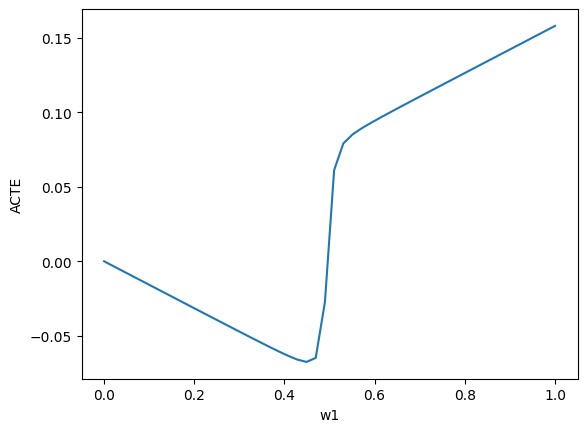

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Retornos artificiales
x = np.array([0.1, 0.2, 0.3, 0.4, 0.5])
y = np.array([0.5, 0.4, 0.3, 0.22, 0.1])
z = np.array([0.35, 0.14, 0, -0.2, -0.6])

# Combinamos los retornos
data = np.vstack((x, y, z))

# Calculamos la matriz de covarianza
cov_matrix = np.cov(data)

def acte(w, cov_matrix):
    """returns the vector of marginal contribution risk

    Args:
        w (array): Vector of weights
        cov_matrix (array): Covariance matrix
    """
    variance = np.dot(np.dot(w, cov_matrix), w.T)
    margin_risk = np.dot(w, cov_matrix) / np.sqrt(variance)
    acte = w * margin_risk
    return acte

n_points = 50
weights = np.linspace(0, 1, n_points)
acte_results = []

for w1 in weights:
    for w2 in weights:
        w3 = 1 - w1 - w2
        if w3 >= 0:
            w = np.array([w1, w2, w3])
            acte_result = acte(w, cov_matrix)
    acte_results.append(acte_result[0])       

acte_results = np.array(acte_results)

# Plot the results
fig, ax = plt.subplots()
#ax.scatter(acte_results[:, 0], acte_results[:, 1], alpha=0.5)
ax.plot(weights,acte_results)
ax.set_xlabel('w1')
ax.set_ylabel('ACTE')
plt.show()


## Ejercicio 8

Seleccione al menos 2 de los siguientes fondos mutuos para construir un portafolio equiponderado vigente desde el primero de enero de 2017 a la fecha de ayer. 

+ "DVEM": WisdomTree Emerging Markets ESG Fund

+ "ICVT": iShares Convertible Bond ETF

+ "JHMI": John Hancock Multifactor Industrials ETF

+ "PSCH": Invesco S&P SmallCap Health Care ETF

+ "ASHR": Xtrackers Harvest CSI 300 China A-Shares ETF

+ "IAU": iShares Gold Trust

+ "IHY": VanEck Vectors International High Yield Bond ETF

Calcule la volatilidad de cada uno de los activos seleccionados, la volatilidad promedio de sus activos y la volatilidad del portafolio construido.

Finalmente grafique la rentabilidad acumulada geométrica de su portafolio propuesto contra el SP500


In [ ]:
# Pista 1
# Como importar los precios de cierre de yahoo finance para varios tickers

#librerias a importar
from pandas_datareader import data as pdr
import yfinance as yf
import datetime
yf.pdr_override() 

#Tickers deseados
tickers=["SPY", "AAPL", "MSFT"]
column_precio=[i+"_Close" for i in tickers]

#Fechas de inicio y fin
start = datetime.datetime(2012,5,31)
end = datetime.datetime(2018,3,1)

#Conexion a yahoo finance
df = pdr.get_data_yahoo(tickers, start=start, end=end,group_by = 'ticker')

# Renombramos columnas
df.columns = ['_'.join(col) for col in df.columns]
#Bos quedamos con aquellas columnas que tienen precio de cierre
df_precios=df[column_precio]
df_precios.head()


In [ ]:
#Desarrolle aqui su ejercicio


De click **aquí** para ver la respuesta.

<!---
# No esperaba verte tan rápido aquí :(

#librerias a importar
from pandas_datareader import data as pdr
import fix_yahoo_finance as yf
import datetime
yf.pdr_override() 

#Tickers deseados
tickers=["DVEM","ICVT","JHMI","PSCH","ASHR","IAU","IHY","SPY"]
column_precio=[i+"_Close" for i in tickers]

start = datetime.datetime(2017,1,1)
end = datetime.datetime(2020,9,17)
df = pdr.get_data_yahoo(tickers, start=start, end=end,group_by = 'ticker')
df.columns = ['_'.join(col) for col in df.columns]
df_precios=df[column_precio]

df_retornos=df_precios.pct_change().dropna()
df_retornos["retorno_port"]=df_retornos[["DVEM_Close","ICVT_Close","JHMI_Close","PSCH_Close","ASHR_Close","IAU_Close","IHY_Close"]].apply(np.mean,axis=1)
print ('Volatilidades')
print(df_retornos.std())
print("--------------------------")
print ('Volatilidad promedio de los activos')
print (df_retornos.iloc[:,:-1].std().mean())

df_retornos["retorno_port_cum"]=df_retornos["retorno_port"]+1
df_retornos["retorno_port_cumg"]=df_retornos["retorno_port_cum"].cumprod()
df_retornos["SPY_cum"]=df_retornos["SPY_Close"]+1
df_retornos["SPY_cumg"]=df_retornos["SPY_cum"].cumprod()

######### GRAFICAS #########
fig=plt.figure(figsize=(10,8))
plt.plot(df_retornos.SPY_cumg,color="orangered",label='SP500')
plt.plot(df_retornos.retorno_port_cumg,label='Portafolio')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Retorno')



--->

# 5.0 Beta Hedging
<p><a name="beta"></a></p>

[[Contenidos]](#contents)

## 5.1 Factor Models

Los Factor models (modelos de factores) son una técnica que permiten explicar los retornos de un activo como la combinación lineal de los retornos de otros activos. La forma general de un modelo de factores es 

$$Y = \alpha + \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_n X_n$$

La cual se parece a la especificación de una regresión lineal múltiple. 

### ¿Qué es la Beta?

La beta de un activo no es otra cosa que el coeficiente respectivo enunciado en la formulación anterior. Por ejemplo si hicieramos la regresión de AMZN contra el  S&P 500 usando el modelo  $Y_{AMZN} = \alpha + \beta X$ , entonces la exposición de  AMZN  contra el S&P 500 sería esa beta. Por otro lado, si usaramos el modelo  $Y_{AMZN} = \alpha + \beta_{1} X_{SPY} + \beta_{2} X_{AAPL}$, tendriamos 2 betas, una de exposición al S&P 500 y otra que sería la exposición de AMZN a  AAPL.



In [ ]:
# Importamos las librerias necesarias
import numpy as np
from statsmodels import regression
import statsmodels.api as sm
import matplotlib.pyplot as plt
import math
from pandas_datareader import data as pdr
import yfinance as yf
import datetime
yf.pdr_override() 


In [ ]:
# conseguimos la data necesaria


#Tickers deseados
tickers=["SPY", "AMZN"]
column_precio=[i+"_Close" for i in tickers]

#Fechas de inicio y fin
start = datetime.datetime(2017,1,11)
end = datetime.datetime(2019,1,1)

#Conexion a yahoo finance
df=yf.download(tickers,start,end,group_by="ticker")

# Renombramos columnas
df.columns = ['_'.join(col) for col in df.columns]
#Bos quedamos con aquellas columnas que tienen precio de cierre
df_precios=df[column_precio]

asset=df_precios[["AMZN_Close"]]
benchmark=df_precios[["SPY_Close"]]



# Calculamos los retornos
r_a = asset.pct_change()[1:]
r_b = benchmark.pct_change()[1:]

# Grafiquemos
fig=plt.figure(figsize=(8,6))  
plt.plot(r_a,label="Amazon")
plt.plot(r_b,label="Benchmark")
plt.ylabel("Retorno Diario")
plt.legend();

Hagamos ahora la regresión para encontrar $\alpha$ y $\beta$:

In [ ]:
# Definamos las variables de forma similar a la formulacion de regresión
X = r_b.values # Toammos los valores ignorando las fehcas
Y = r_a.values

def linreg(x,y):
    
    # Añadimos una constante
    x = sm.add_constant(x)
    model = regression.linear_model.OLS(y,x).fit()
    
    x = x[:, 1]
    return model.params[0], model.params[1]

alpha, beta = linreg(X,Y)
print ('alpha: ' + str(alpha))
print ('beta: ' + str(beta))

Veamos que al graficar $\alpha + \beta X$, podemos ver la relación con la linea de mejor estimación:

In [ ]:
X2 = np.linspace(X.min(), X.max(), 100)
Y_hat = X2 * beta + alpha

plt.scatter(X, Y, alpha=0.3) # Plot the raw data
plt.xlabel("SPY Retorno Diario")
plt.ylabel("AMZN Retorno Diario")

 # Añadimos una linea roja de mejor ajuste
plt.plot(X2, Y_hat, 'r', alpha=0.9);

## 5.2. Exposición a Riesgo 

En un plano más general, esta beta se interpreta como la medición de exposición a riesgo tomado al mantener una posición en el activo.

Si un activo tiene una alta exposición en términos de beta al  S&P 500, entonces va a irle muy bien en las subidas del mercado pero va a tener desempeño pobre cuando este vaya a la baja.  Una beta alta corresponde a un riesgo especulativo alto.




### Hedging (Cobertura)

Si determinamos que los retornos de nuestro portafolio dependen del mercado via esta relación:

$$Y_{portfolio} = \alpha + \beta X_{SPY}$$

podemos tomar una posición corta en SPY  con el objetivo de cancelar este riesgo. La cantidad a tomar sería  $-\beta V$ donde $V$ es el valor total de nuestro portafolio.

Esta estrategia funciona si nuestros retornos pueden aproximarse con $\alpha + \beta X_{SPY}$, luego añadiendo un corto en SPY  hará que nuestros retornos sean  $\alpha + \beta X_{SPY} - \beta X_{SPY} = \alpha$. Así, nuestros retornos serán puramente alfa (en promedio), el cual es independiente del SPY y no está expuesto al mercado.

### Market Neutral

Cuando una estrategia tiene beta de 0 se denomina market neutral.


### Advertencias

+ La beta puede cambiar en el tiempo

+ Violaciones de supuestos OLS 





## 5.3. Implementando el Hedging

Ahora que identificamos el hedge, veamos como afectaría a nuestros retornos. Construiremos un portafolio usando el activo y el benchmark, ponderando el  benchmark con  $-\beta$ (negativo ya que es una posición en corto).

In [ ]:
# Construccion de un portaolfio con cobertura de Beta
portfolio = -1*beta*r_b.values + r_a.values

# Grafico de los retornos
fig=plt.figure(figsize=(10,8))  
plt.plot(portfolio,alpha=0.9,label="portfolio",color="orangered")
#portfolio.plot(alpha=0.9)
plt.plot(r_b.values,alpha=0.5,label="SPY")
plt.plot(r_a.values,alpha=0.5,label="AMZN",color="lime")
#r_b.plot(alpha=0.5);
#r_a.plot(alpha=0.5);
plt.ylabel("Daily Return")
plt.legend();

Calculemos las diferencias entre los desempeños al calcular retornos medios y volatilidades:

In [ ]:
print ("retornos promedio: ", portfolio.mean(), np.mean(r_a.values))
print ("Volatilidades: ", np.std(portfolio), np.std(r_a.values))

Los resultados muestran que reducimos la volatilidad  a costa de retornos. Veamos que la beta de nuestro portafolio ha sido eliminada:

In [ ]:
P = portfolio
alpha, beta = linreg(X,P)
print ('alpha: ' + str(alpha))
print ('beta: ' + str(np.round(beta,4)))

Luego de desarrollar nuestro hedging, veamos si la estrategia se mantiene out of sample

## Ejercicio  9 

Evalue la validez de la estrategia out of sample para lo que va de 2020 calculando retornos promedio y volatilidad, utilizando AMZN y el SPY. Para eso calcule los nuevos retornos pero construya 
el portafolio neutral a mercado utilizando la beta calculada en la sección (beta_historica=1.5731148412935139)



In [ ]:
#Pista 1
portfolio_out_sample = -1*historical_beta*r_b_out_sample.values + r_a_out_sample.values



## Tradeoff Alpha/beta 

Cubrirse contra un benchmark como el mercado tiende a reducir los retornos de su portafolio cuando el mercado está bullish, sin embargo trae la ventaja de unos retornos menos volatiles. Además, este tipo de estrategias suelen fallar en el largo plazo debido a movimientos fuertes en el mercado.



# 5.0 Factor Models
<p><a name="factor"></a></p>

[[Contenidos]](#contents)

Un modelo de factores es un modelo financiero que emplea múltiples factores en sus cálculos para explicar fenómenos de mercado o equilibrio en el precio de los activos. Los modelos de factores pueden emplearse tanto para expliar el comportamiento de un activo individual como el de un portafolio de activos.

Algunos ejemplos de factores son el market cap, al utilidad neta, el ratio P/E, la prima de riesgo, etc...

Vamos a centrarnos en los modelos de factores lineales. Dada un conjunto $k$ de factores, podemos representar los retornos de un activo, $R_t$, de la siguiente manera:

$$R_t = \alpha_t + \beta_{t, F_1}F_1 + \beta_{t, F_2}F_2 + ... + \beta_{t, F_k}F_k + \epsilon_t$$

donde cada $F_j$ representa el retorno de un factor

## ¿A qué hace referencia el término factor?

El término factor es utilizado en una variedad de formas incluyendo:

+ El retorno de una combinación de activos, ejemplo: El retorno de una posición larga en tesoros de 10Y y una posición corta en tesoros de 2Y.
+ Un factor fundamental, como por ejemplo el retorno de activos optimizados para trackear la inflación
+ Un factor estadístico, como una combinación de activos que explican la variación de los retornos y que es construido a través de análisis de componentes principales.

## 5.1  Capital Asset Pricing Model - CAPM (1 Factor)

El modelo CAPM  es una medida clásica del costo del capital. Utilizado frecuentemente para evaluar el precio de activos financieros además del impacto de la prima de riesgo sobre el mercado como un todo.

## 5.2. Riesgo Idiosincratico y Sistémico

En general los  portafolios y activos enfrentan dos tipos de riesgos: 

+ **Riesgo Idiosincratico** riesgos asociados a factores especificos de una compañía, es un riesgo diversificable.
+ **Riesgo sistémico**  afecta a todo el mercado y sus participantes. No puede ser diversificado.

## Prima de Riesgo

Debido a que el riesgo sistémico no puede ser removido de un portafolio, los inversionistas suelen exigir una prima de riesgo, es decir, un retorno extra por encima de la tasa libre de riesgo para compensarles el riesgo que toman al invertir en nuestro portafolio.

Siguiendo este razonamiento podemos concluir que la prima de riesgo no tiene relación alguna con factores idiosincraticos sino por el contrario dependerá exclusivamnete del nivel de riesgo sistémico que trae consigo.
Teóricamente podemos definir el retorno de un activo como:

$$E[\mbox{Return}] = \mbox{Risk-Free Rate of Return} + \mbox{Risk Premium}$$

La beta que obtenemos de la regresión de los retornos de un activo contra los retornos del mercado será nuestra medida de riesgo sistémico. Esta beta representa la sensiblidad de un activo a los choques en el mercado .

Dada esta beta, la prima de riesgo del ativo $i$ es definida como:

$$\mbox{Risk Premium of Asset}_i = \beta (\mbox{Market Risk Premium})$$

Este modelo tan simple es el CAPM

## 5.3. Capital Asset Pricing Theory

Podemos expresar el CAPM mas simple como:

$$E[R_i] = R_F + \beta(E[R_M] - R_F)$$

donde $R_i$ es el retorno del activo $i$, $R_F$ es la tasa libre de riesgo, y $R_M$ es el retorno del mercado.El CAPM determina el minimo retorno requerido para convencer a un inversionista de tener posiciones en un activo particular.



In [ ]:
#librerias a importar
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels import regression
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import fix_yahoo_finance as yf
import datetime
yf.pdr_override() 

#Tickers deseados
tickers=["SPY", "AAPL", "BIL"]
column_precio=[i+"_Close" for i in tickers]

#Fechas de inicio y fin
start = datetime.datetime(2014,1,1)
end = datetime.datetime(2014,12,31)

#Conexion a yahoo finance
df = pdr.get_data_yahoo(tickers, start=start, end=end,group_by = 'ticker')

# Renombramos columnas
df.columns = ['_'.join(col) for col in df.columns]
#Bos quedamos con aquellas columnas que tienen precio de cierre
df_precios=df[column_precio]
df_precios.head()



#Elegimos la acción a valorar mediante CAPM
R = df_precios["AAPL_Close"].pct_change()[1:]

# Nuestro referente de tasa libre de riesgo
R_F = df_precios["BIL_Close"].pct_change()[1:]

# Nuestro referente del mercado
M = df_precios["SPY_Close"].pct_change()[1:]

#Calculamos el CAPM para Apple
AAPL_results = regression.linear_model.OLS(R-R_F, sm.add_constant(M)).fit()
AAPL_beta = AAPL_results.params[1]

fig=plt.figure(figsize=(8,6)) 
M.plot()
R.plot()
R_F.plot()
plt.xlabel('Tiempo')
plt.ylabel('Retorno porcentual diario')
plt.legend();

AAPL_results.summary()

Podemos utilizar la beta calculada para hacer predicciones de los retornos de Apple

In [ ]:
predictions = R_F + AAPL_beta*(M - R_F) # CAPM equation


fig=plt.figure(figsize=(8,6)) 
predictions.plot()
R.plot(color='Y')
plt.legend(['Predicción', 'Retorno Real'])

plt.xlabel('Tiempo')
plt.ylabel('Retorno Porcentual Diario');

## 5.4. Supuestos del CAPM

Hay dos supuestos principales:

* No hay costos de transacción y todos los agentes en el mercado pueden pedir y prestar dinero a la tasa libre de riesgo
* Asumimos que todos los inversionistas son optimizadores en términos de *media-varianza*, es decir, solo demandan portafolios optimos ubicados en la **frontera eficiente** 

Veamos la siguiente derivación programatica de la frontera eficiente para 4 activos (Tomada de una fuente externa)

In [ ]:
from scipy import optimize
import cvxopt as opt
from cvxopt import blas, solvers

In [ ]:
np.random.seed(123)

solvers.options['show_progress'] = False

# Numero de activos
n_assets = 4

# Numero de observaciones
n_obs = 2000

## Generamos retornos aleatorios para nuestros 4 activos
return_vec = np.random.randn(n_assets, n_obs)

def rand_weights(n):
    ''' 
    Produce n pesos aleatorios que suman 1 
    '''
    k = np.random.rand(n)
    return k / sum(k)

def random_portfolio(returns):
    ''' 
    Retorna la media y desviacion estandar para un portafolio dado
    '''

    p = np.asmatrix(np.mean(returns, axis=1))
    w = np.asmatrix(rand_weights(returns.shape[0]))
    C = np.asmatrix(np.cov(returns))
    
    mu = w * p.T
    sigma = np.sqrt(w * C * w.T)
    
    # Quitamos outliers de la grafica
    if sigma > 2:
        return random_portfolio(returns)
    return mu, sigma

def optimal_portfolios(returns):
    n = len(returns)
    returns = np.asmatrix(returns)
    
    N = 100000
    
    # Creamos una lista de retornos para optimizar el riesgo
    mus = [100**(5.0 * t/N - 1.0) for t in range(N)]
    
    
    S = opt.matrix(np.cov(returns))
    pbar = opt.matrix(np.mean(returns, axis=1))
    
    # Creamos las matrices e restricción
    G = -opt.matrix(np.eye(n))   # negative n x n identity matrix
    h = opt.matrix(0.0, (n ,1))
    A = opt.matrix(1.0, (1, n))
    b = opt.matrix(1.0)
    
    # Calculamos la frontera eficiente con programación cuadratica
    portfolios = [solvers.qp(mu*S, -pbar, G, h, A, b)['x'] 
                  for mu in mus]
    
    ## Calculamos el riesgo y retorno de la frontera
    returns = [blas.dot(pbar, x) for x in portfolios]
    risks = [np.sqrt(blas.dot(x, S*x)) for x in portfolios]
    
    return returns, risks

n_portfolios = 50000

means, stds = np.column_stack([random_portfolio(return_vec) for x in range(n_portfolios)])

returns, risks = optimal_portfolios(return_vec)


fig=plt.figure(figsize=(10,8)) 
plt.plot(stds, means, 'o', markersize=2, color='navy')
plt.xlabel('Riesgo')
plt.ylabel('Retorno')
plt.title('Portafolios simulados: Media y Varianza');

plt.plot(risks, returns, '-', markersize=3, color='red');
plt.legend(['Portafolios', 'Frontera Eficiente']);

Cada punto azul representa un portafolio distinto mientras que la linea roja representa la frontera eficiente, es decir, los portafolios con mejor desempeño dado un nivel de riesgo.

Ahora, para encontrar el mejor portafolio de todos se hace necesario maximizar el ratio de Sharpe. La linea que representa las diferentes combinaciones de un activo libre de riesgo con un portafolio de activos riesgosos se conoce como la  Capital Allocations Line (CAL). La pendiente de la CAL es el ratio de Sharpe. Para maximizar el ratio de sharpe debemos encontrar el punto de tangencia entre la CAL y la frontera eficiente.

In [ ]:
def maximize_sharpe_ratio(return_vec, risk_free_rate):
    """
    Encuentra el portafolio optimo en  CAPM optimizando el ratio de Sharpe
    """
    
    def find_sharpe(weights):
        
        means = [np.mean(asset) for asset in return_vec]
        
        numerator = sum(weights[m]*means[m] for m in range(len(means))) - risk_free_rate
        
        weight = np.array(weights)
        
        denominator = np.sqrt(weights.T.dot(np.corrcoef(return_vec).dot(weights)))
        
        return numerator/denominator
    
    guess = np.ones(len(return_vec)) / len(return_vec)
    
    def objective(weights):
        return -find_sharpe(weights)
    
    
    cons = {'type':'eq', 'fun': lambda x: np.sum(np.abs(x)) - 1} 

    
    bnds = [(0, 1)] * len(return_vec)
    
    results = optimize.minimize(objective, guess,
                            constraints=cons, bounds=bnds, 
                            method='SLSQP', options={'disp': False})
    
    return results

risk_free_rate = np.mean(R_F)

results = maximize_sharpe_ratio(return_vec, risk_free_rate)


optimal_mean = sum(results.x[i]*np.mean(return_vec[i]) for i in range(len(results.x)))

optimal_std = np.sqrt(results.x.T.dot(np.corrcoef(return_vec).dot(results.x)))

fig=plt.figure(figsize=(10,8))

plt.plot(stds, means, 'o', markersize=2, color='navy')
plt.ylabel('Return')
plt.xlabel('Risk')


eqn_of_the_line = lambda x : ( (optimal_mean-risk_free_rate) / optimal_std ) * x + risk_free_rate    

xrange = np.linspace(0., 1., num=11)

plt.plot(xrange, [eqn_of_the_line(x) for x in xrange], color='red', linestyle='-', linewidth=2)

# Our optimal portfolio
plt.plot([optimal_std], [optimal_mean], marker='o', markersize=12, color="navy")

plt.legend(['Portfolios', 'Capital Allocation Line', 'Optimal Portfolio']);

Podemos recuperar las caracteristicas inviduales de este portafolio optimo:

In [ ]:
for a in range(len(return_vec)): 
    print ( "Retorno y  Riesgo del Activo", a, ":", np.mean(return_vec[a]), ",",np.std(return_vec[a])  ) 
    
print ("Retorno y Riesgo del portaofolio óptimo", optimal_mean, optimal_std)

## Ejercicio 10

Calcule el CAPM para una acción americana de su preferencia, utilice información de enero de 2018 hasta diciembre de 2019. Luego grafique el retorno real de su activo contra el retorno estimado del modelo en 2020.

In [ ]:
# Desarrolle aqui su ejercicio

## 5.1 Modelo de 3 Factores de Fama y French

El modelo de tres factores propuesto por Eugene Fama y  Kenneth French en su articulo  *Common risk factors in the returns on stocks and bonds* del Journal of financial economics  es un punto de referencia fundamental para la valoración de activos y la gestión de portafolios.

Los factores permiten explicar los retornos que han presentado los activos  y conocer la trayectoria de estos factores ayuda a predecir también su desempeño. La rentabilidad esperada de un activo o portafolio estará así determinada por la sensibilidad respecto a los siguientes tres factores:

1. El exceso de rentabilidad del mercado respecto a un activo libre de riesgo.

2. La diferencia entre el retorno de las acciones de pequeña capitalización y el retorno de las acciones de más capitalización. (SMB)

3. La diferencia entre el retorno de las empresas con un alto ratio book-to-market equity (diferencia entre valor en libros y valor bursátil) y las compañías con un bajo book-to-market equity. (HML)

In [ ]:
import pandas as pd
import pandas_datareader as web
import statsmodels.api as smf

In [ ]:
#Funcion para consultar los factores de Fama y French
def get_fama_french():
    # Now open the CSV file
    # Read the csv 
    ff_factors = pd.read_csv('https://raw.githubusercontent.com/jisazac/pythonfinanzaseafit/master/F-F_Research_Data_Factors2.csv',encoding="latin1",sep=";")
    ff_factors.set_index("Date",inplace=True)
    # Format the date index
    ff_factors.index = pd.to_datetime(ff_factors.index, format= '%Y%m')
    # Format dates to end of month
    ff_factors.index = ff_factors.index.to_period('M').to_timestamp('M')
    
        
    # Convert from percent to decimal
    ff_factors['Mkt-RF']=ff_factors['Mkt-RF']/100
    ff_factors['SMB']=ff_factors['SMB']/100
    ff_factors['HML']=ff_factors['HML']/100
    ff_factors['RF']=ff_factors['RF']/100
   
    return ff_factors

¿Cómo se han comportado los factores en los últimos do
s años?

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
ff_factors=get_fama_french()

ff_factors=ff_factors.iloc[-24:,]
SMB_CUM = np.cumprod(ff_factors["SMB"].values+1)
HML_CUM = np.cumprod(ff_factors["HML"].values+1)

plt.plot(ff_factors.index, SMB_CUM)
plt.plot(ff_factors.index, HML_CUM)
plt.ylabel('Cumulative Return')
plt.legend(['SMB Portfolio Returns', 'HML Portfolio Returns'])

In [ ]:
#Funcion para consultar el precio de cierre de un ticker
def get_price_data(ticker, start, end):
    price = web.get_data_yahoo(ticker, start, end)
    price = price['Close'] 
    return price

In [ ]:
#Funcion para calcular los retornos mensuales
def get_return_data(price_data, period = "M"):
    
    
    price = price_data.resample(period).last()
    
    
    ret_data = price.pct_change()[1:]
    
    
    ret_data = pd.DataFrame(ret_data)
    
    
    ret_data.columns = ['portfolio']
    return ret_data
    


In [ ]:
#Función para calcular el modelo Fama-French de 3 factores
def run_reg_model(ticker,start,end):
    
    ff_data = get_fama_french()
    ff_last = ff_data.index[ff_data.shape[0] - 1].date()
    
    price_data = get_price_data(ticker,start,end)
    price_data = price_data.loc[:ff_last]
    ret_data = get_return_data(price_data, "M")
    all_data = pd.merge(pd.DataFrame(ret_data),ff_data, how = 'inner', left_index= True, right_index= True)
    all_data.rename(columns={"Mkt-RF":"mkt_excess"}, inplace=True)
    all_data['port_excess'] = all_data['portfolio'] - all_data['RF']
    # Correr el modelo
    model = smf.formula.ols(formula = "port_excess ~ mkt_excess + SMB + HML", data = all_data).fit()
    return model.params

Asi esta función recoge los diferentes elementos para poder estimar el siguiente modelo en una sola linea de código:

$$R_{t}=\alpha+\beta_{1}(E[R_M] - R_F)+\beta_{2}SMB+\beta_{3}HML$$

In [ ]:
#Modularizacion del modelo Fama-French Mensual, para el ticker GGRAX
ggrax_model = run_reg_model("GGRAX", start = "1999-05-01", end = "2019-06-30")
print(ggrax_model)

## Ejercicio 11

Calcule para tres fondos distintos de los utilizados en la sección la exposición a los factores de Fama y French para cada uno de ellos. Primero desde Enero de 2000 hasta Diciembre 2010, y luego desde 2010 hasta julio 2020.



In [ ]:
# Desarrolle aqui su ejercicio

# 6.0 Análisis de Componentes Principales


EL análisis de componentes principales  (PCA) es un método clásico para la reducción de dimensionalidad. Este utiliza los primeros **componentes prncipales**, los cuales son caracteristicas estadisticas que explican la mayoría d ela variación de una matriz  $m \times n$ de datos  $\mathbf{X}$, con el objetivo de describir de forma simplificada una matriz  $\mathbf{X}$ de gran escala.   

## 6.1 PCA en un portafolio de 10 activos

Construyamos un portafolio con 10 activos, IBM, MSFT, FB, T,IAU, INTC, NEM, AU, AEM, GFI. 5 de ellos están relacionados con el sector tecnología y las 5 restantes son compañías de extracciónd e oro.

En este caso cada columna del dataframe es una variable distinta haciendo referencia a un activo de renta variable

In [ ]:
#librerias a importar
from pandas_datareader import data as pdr
import fix_yahoo_finance as yf
import datetime
import numpy as np
yf.pdr_override() 

#Tickers deseados
tickers= ['IBM','MSFT', 'FB', 'T', 'INTC','NEM','IAU', 'AU', 'AEM', 'GFI']
column_precio=[i+"_Close" for i in tickers]

#Fechas de inicio y fin
start = datetime.datetime(2015,9,1)
end = datetime.datetime(2016,11,1)

#Conexion a yahoo finance
df = pdr.get_data_yahoo(tickers, start=start, end=end,group_by = 'ticker')

# Renombramos columnas
df.columns = ['_'.join(col) for col in df.columns]
#Bos quedamos con aquellas columnas que tienen precio de cierre
df_precios=df[column_precio]
df_precios.head()

df_retornos=df_precios.pct_change().dropna()
df_retornos["retorno_port"]=df_retornos[column_precio].apply(np.mean,axis=1)
df_retornos.head()
portfolio_returns=df_retornos.iloc[:,0:-1]

In [ ]:
#Importados de la libreria sklearn el modulo de PCA
from sklearn.decomposition import PCA
#Especificamos que queremos dos componentes principales
num_pc = 2

X = np.asarray(portfolio_returns)
[n,m] = X.shape
print ('Numero de fechas es {}.'.format(n))
print ('Numero de activos es {}.'.format(m))

pca = PCA(n_components=num_pc) # numero de componentes principales
pca.fit(X)

percentage =  pca.explained_variance_ratio_
percentage_cum = np.cumsum(percentage)
print ('{0:.2f}% de la varianza es explicada por los dos primeros componentes principales 2 PCs'.format(percentage_cum[-1]*100))

pca_components = pca.components_

Notese como solo dos componentes principales capturan la gran mayoría de la varianza presente en nuestros datos.

Entremos mas en detalle en nuestros dos primeros factores y grafiquemos sus contribuciones


In [ ]:
x = np.arange(1,len(percentage)+1,1)


import matplotlib.pyplot as plt
fig=plt.figure(figsize=(12,8))
plt.subplot(1, 2, 1)
plt.bar(x, percentage*100, align = "center")
plt.title('Contribución  componentes principales',fontsize = 16)
plt.xlabel('componentes principales',fontsize = 16)
plt.ylabel('porcentaje',fontsize = 16)
plt.xticks(x,fontsize = 16) 
plt.yticks(fontsize = 16)
plt.xlim([0, num_pc+1])

plt.subplot(1, 2, 2)
plt.plot(x, percentage_cum*100,'ro-')
plt.xlabel('componentes principales',fontsize = 16)
plt.ylabel('porcentaje',fontsize = 16)
plt.title('Contribución Acumulada  componentes',fontsize = 16)
plt.xticks(x,fontsize = 16) 
plt.yticks(fontsize = 16)
plt.xlim([1, num_pc])
plt.ylim([50,100]);

A partir de estos componentes principales podemos construir "factores de riesgo estadisticos" de manera similar a los factores de riesgo tradicionales. Esto nos debería dar una idea de cuanto de los retornos de nuestro portafolio puede ser explicado por una característica estadistica no observable.

In [ ]:
import pandas as pd
factor_returns = X.dot(pca_components.T)
factor_returns = pd.DataFrame(columns=["factor 1", "factor 2"], 
                              index=portfolio_returns.index,
                              data=factor_returns)
factor_returns.head()

Veamos ahora como esta compuesto cada factor

In [ ]:
factor_exposures = pd.DataFrame(index=["factor 1", "factor 2"], 
                                columns=portfolio_returns.columns,
                                data = pca.components_).T

In [ ]:
factor_exposures

In [ ]:
labels = factor_exposures.index
data = factor_exposures.values

In [ ]:
fig=plt.figure(figsize=(10,6))
plt.subplots_adjust(bottom = 0.1)
plt.scatter(
    data[:, 0], data[:, 1], marker='o', s=300, c='m',
    cmap=plt.get_cmap('Spectral'))
plt.title('Coeficientes del  PC1 y PC2')
plt.xlabel('Exposicion del  PC1')
plt.ylabel('Exposicion del PC2')
plt.grid()

for label, x, y in zip(labels, data[:, 0], data[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0')
    );

## Ejercicio 12

Utilizando la base de datos "https://raw.githubusercontent.com/jisazac/pythonfinanzaseafit/master/SP_WEEKLY.csv"  replique el ejercicio anterior culminando el grafico de dispersión de los dos primeros componentes principales.
Sin embargo tenga en cuenta los siguientes cambios:

+ Utilizar 30 en lugar de 10 activos cualesquiera
+ Calcular 3 componentes principales en lugar de 2




# 7.0 Optimización de Portafolios

Vamos a enfocar la optimización de portafolios desde la perspectiva de 
la teoría moderna del portafolio, la cual propone como maximizar el retorno y minimizar el riesgo, mediante una adecuada elección de los componentes. Propuesta por Harry Markowitz en 1952.

La teoría moderna de la selección de cartera (modern portfolio theory) propone que el inversor debe abordar la cartera como un todo, estudiando el riesgo y retorno global, en lugar de escoger valores individuales en virtud del retorno esperado de cada valor en particular. Esta teoría puede enunciarse como un problema de optimización con restricciones

$$\begin{split}\begin{equation*}
\begin{aligned}
& \underset{w}{\text{minimise}} & & w^T \Sigma w \\
& \text{subject to} & & w^T\mu \geq \mu^*\\
&&& w^T\mathbf{1} = 1 \\
&&& w_i \geq 0 \\
\end{aligned}
\end{equation*}\end{split}$$



Vamos a utilizar los paquetes propuestos por el libro:

<p><img alt="comparison  logo" width="250" height="280" src="https://miro.medium.com/max/500/0*HPlMKEFv8M2pUcQy.jpg"
" align="center" hspace="10px" vspace="0px"></p>


In [ ]:
# Importamos las librerias a utilizar
from pandas_datareader import data as web
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt




Instalamos el paquete PyPortfolioOpt

<p><img alt="comparison  logo" width="450" height="280" src="https://pyportfolioopt.readthedocs.io/en/latest/_images/conceptual_flowchart_v2-grey.png"
" align="center" hspace="10px" vspace="0px"></p>



In [ ]:
!pip install PyPortfolioOpt

In [ ]:
#Enlistamos 5 activos con sus tickers respectivos
# y les asignamos pesos inciales iguales a 1/5

assets =  ["FB", "AMZN", "AAPL", "NFLX", "GOOG"]
weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2])
weights

In [ ]:
#Fecha de inicio
stockStartDate = '2013-01-01'
# Vamos hasta la feha de hoy y la formateamos
today = datetime.today().strftime('%Y-%m-%d')

#Creamos un dataframe vacío y le añadimos con un 
# ciclo cada uno de los activos
df = pd.DataFrame()

for stock in assets:
  df[stock] = web.DataReader(stock,data_source='yahoo',start=stockStartDate , end=today)['Close']

In [ ]:
# Grafiquemos el comportamiento de los precios de nuestros activos
title = 'Comportamiento Histórico'
#Get the stocks
my_stocks = df
#Create and plot the graph
plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5


for c in my_stocks.columns.values:
  plt.plot( my_stocks[c],  label=c)
plt.title(title)
plt.xlabel('Fecha',fontsize=18)
plt.ylabel('Close Price USD',fontsize=18)
plt.legend(my_stocks.columns.values, loc='upper left')
plt.show()

In [ ]:
#Calculamos los retornos
returns = df.pct_change()

#Calculamos nuestra matriz de varianzas y covarianzas de la forma
# tradicional en terminos anuals
cov_matrix_annual = returns.cov() * 252
cov_matrix_annual

In [ ]:
#Calculamos la varianza del portafolio utilizando
# la especificación matricial
port_variance = np.dot(weights.T, np.dot(cov_matrix_annual, weights))
print("Varianza del portafolio: ",port_variance)

#Calculamos la volatilidad del portafolio
port_volatility = np.sqrt(port_variance)
print("Volatilidad del portafolio: ",port_volatility)

In [ ]:
#Calculemos el retorno anual simple del portafolio
portfolioSimpleAnnualReturn = np.sum(returns.mean()*weights) * 252
portfolioSimpleAnnualReturn

In [ ]:
#Veamos unas métricas del portafolio propuesto de momento

percent_vols = str(round(port_volatility, 2) * 100) + '%'
percent_ret = str(round(portfolioSimpleAnnualReturn, 2)*100)+'%'
print("Retorno Anual Esperado: "+ percent_ret)
print('Volatilidad Anual : '+percent_vols)


Ahora importemos las funciones del paquete pypfopt necesarias para resolver el ejercicio

In [ ]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [ ]:
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df) 

In [ ]:
print("Retornos Esperados de los activos")
print(mu)

In [ ]:
#Asi, obtenemos los pesos optimos de nuestro portafolio
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe() #Maximizamos ratio de sharpe y obtenemos los pesos optimos
cleaned_weights = ef.clean_weights() 
print(cleaned_weights) 
print("------------------------------")
ef.portfolio_performance(verbose=True)

## Ejercicio 13

Calcule un portafolio óptimo utilizando al menos 2 fondos de la sección 4 para el mismo periodo de tiempo. Imprima los resultados de su portafolio óptimo.

In [ ]:
#Desarrolle aquí su ejercicio

# 8.0 PCA: Caso Aplicado a Renta Fija


In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# Leemos la data de la ruta o repositorio
df = pd.read_csv("spot_curve_uk.csv")
# Select all of the data up to 10 years

df.set_index("Date",inplace=True)
df.head()

,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,5.5,...,20.5,21.0,21.5,22.0,22.5,23.0,23.5,24.0,24.5,25.0
Date,,,,,,,,,,,,,,,,,,,,,
31/01/2000,6.32,6.43,6.47,6.48,6.46,6.43,6.39,6.34,6.29,6.23,...,4.45,4.42,4.40,4.38,4.36,4.34,4.32,4.31,4.30,4.29
29/02/2000,6.25,6.30,6.30,6.28,6.24,6.19,6.13,6.07,6.01,5.95,...,4.34,4.31,4.29,4.27,4.26,4.24,4.23,4.21,4.20,4.19
31/03/2000,6.25,6.29,6.27,6.22,6.16,6.09,6.01,5.93,5.86,5.78,...,4.33,4.31,4.29,4.28,4.27,4.25,4.24,4.23,4.22,4.21
30/04/2000,6.10,6.10,6.07,6.02,5.96,5.90,5.83,5.77,5.70,5.64,...,4.24,4.22,4.21,4.19,4.18,4.16,4.15,4.14,4.13,4.12
31/05/2000,6.13,6.16,6.14,6.08,6.01,5.93,5.85,5.77,5.70,5.62,...,4.28,4.26,4.24,4.22,4.20,4.18,4.16,4.15,4.13,4.11


<AxesSubplot:xlabel='Date'>

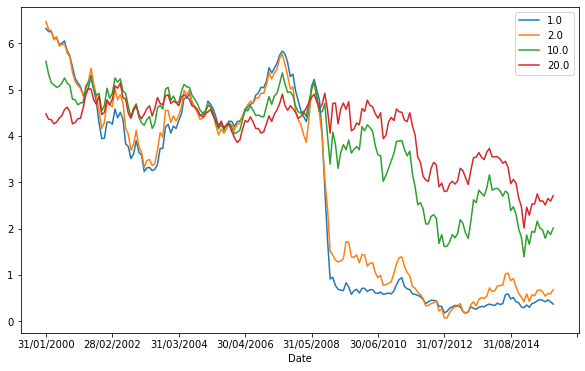

In [25]:
#Grafico Historico
df[["1.0","2.0","10.0","20.0"]].plot(figsize=(10,6))

<AxesSubplot:>

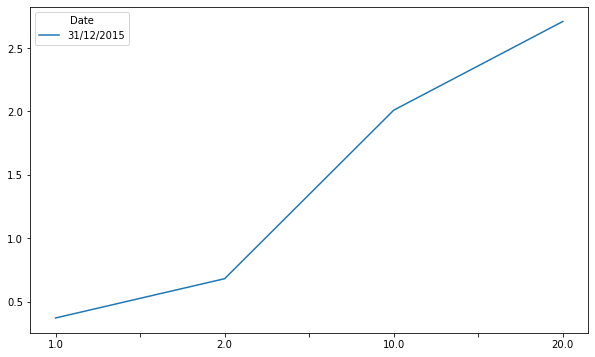

In [27]:
# Grafico de corte transversal
df[["1.0","2.0","10.0","20.0"]].tail(1).T.plot(figsize=(10,6))

In [22]:
# Standardise the data in the df into z scores

df_std = ((df-df.mean()) / df.std())
df_std.head()

,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,5.5,...,20.5,21.0,21.5,22.0,22.5,23.0,23.5,24.0,24.5,25.0
Date,,,,,,,,,,,,,,,,,,,,,
31/01/2000,1.639318,1.705986,1.740368,1.762877,1.772998,1.780179,1.783482,1.781849,1.780477,1.772412,...,0.472273,0.437559,0.415619,0.394178,0.371581,0.350248,0.328154,0.320449,0.314701,0.308299
29/02/2000,1.606717,1.643900,1.656547,1.660723,1.656359,1.647970,1.634600,1.621075,1.607112,1.592194,...,0.315171,0.277648,0.253216,0.229130,0.219333,0.195656,0.187132,0.161671,0.153789,0.145501
31/03/2000,1.606717,1.639124,1.641755,1.630077,1.613945,1.592883,1.565885,1.537711,1.514238,1.482776,...,0.300889,0.277648,0.253216,0.244134,0.234558,0.211115,0.202801,0.193427,0.185971,0.178060
30/04/2000,1.536857,1.548384,1.543142,1.527922,1.507910,1.488217,1.462813,1.442438,1.415172,1.392667,...,0.172351,0.146812,0.135105,0.109094,0.097534,0.071982,0.061779,0.050528,0.041150,0.031542
31/05/2000,1.550829,1.577039,1.577656,1.558569,1.534418,1.504743,1.474265,1.442438,1.415172,1.379794,...,0.229479,0.204961,0.179397,0.154108,0.127984,0.102900,0.077448,0.066405,0.041150,0.015262


In [31]:
# Create a covariance matrix 
cov_matrix_array = np.array(np.cov(df_std, rowvar=False))

# Perform eigendecomposition
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix_array)

# Put data into a DataFrame 
df_eigval = pd.DataFrame({"Eigenvalues":eigenvalues})
df_eigvec = pd.DataFrame(eigenvectors)
eigenvalues

array([4.49130515e+01, 3.91490587e+00, 1.34502508e-01, 2.71882003e-02,
       8.62807103e-03, 1.02239996e-03, 2.64595595e-04, 3.94108549e-05,
       2.65462512e-05, 2.63098418e-05, 2.24369523e-05, 2.13657649e-05,
       2.00529682e-05, 1.92313855e-05, 1.78990630e-05, 1.67424483e-05,
       1.60253036e-05, 1.51956287e-05, 1.45279324e-05, 1.29926901e-05,
       1.27900445e-05, 1.20628960e-05, 1.03706475e-05, 1.05569529e-06,
       1.00669258e-05, 9.88187829e-06, 9.34460235e-06, 1.48865375e-06,
       1.69411538e-06, 1.93357213e-06, 2.12214145e-06, 2.26667326e-06,
       2.77774175e-06, 2.96715655e-06, 3.28850290e-06, 3.57726272e-06,
       8.56787697e-06, 8.26010023e-06, 7.79161811e-06, 7.65751847e-06,
       4.07876536e-06, 4.38902919e-06, 4.75511553e-06, 4.92609787e-06,
       5.31588823e-06, 5.64800192e-06, 6.58769881e-06, 6.26957200e-06,
       6.15350242e-06])

In [32]:
# Work out explained proportion 
df_eigval["Explained proportion"] = df_eigval["Eigenvalues"] / np.sum(df_eigval["Eigenvalues"])

#Format as percentage
df_eigval.style.format({"Explained proportion": "{:.2%}"})

,Eigenvalues,Explained proportion
0,44.913052,91.66%
1,3.914906,7.99%
2,0.134503,0.27%
3,0.027188,0.06%
4,0.008628,0.02%
5,0.001022,0.00%
6,0.000265,0.00%
7,0.000039,0.00%
8,0.000027,0.00%
9,0.000026,0.00%


In [33]:
principal_components = df_std.dot(eigenvectors)
principal_components.head()

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
Date,,,,,,,,,,,,,,,,,,,,,
31/01/2000,-7.954140,3.796736,0.747118,-0.162828,-0.314993,0.033594,-0.003405,0.005925,-0.002269,-0.003010,...,-0.004911,0.002851,-0.000044,-0.003658,0.000432,-0.002393,0.000555,-0.002260,0.000333,-0.004287
29/02/2000,-6.658700,3.850307,0.471722,-0.135993,-0.230799,0.023854,-0.003715,0.006717,0.003090,-0.002197,...,-0.001016,-0.001414,0.001940,0.000561,0.002556,-0.001502,0.000074,0.002089,-0.003644,0.001069
31/03/2000,-6.117852,3.665328,0.080680,-0.180386,-0.159779,0.025677,0.004758,-0.000537,-0.002207,-0.001894,...,-0.002834,-0.000456,-0.000649,0.003672,0.000941,0.000899,-0.002096,-0.000153,0.001705,-0.000561
30/04/2000,-5.496048,3.763970,0.273128,-0.087998,-0.213192,0.028336,0.006590,-0.004433,0.001819,-0.000721,...,0.001562,-0.000495,-0.003845,-0.000530,0.000493,-0.002847,0.000742,-0.001104,0.000401,-0.000909
31/05/2000,-5.564263,3.658990,0.154624,-0.042483,-0.037856,0.046089,0.020942,-0.010452,0.001145,-0.003082,...,0.001124,0.001873,0.000328,-0.002248,-0.000004,0.001559,-0.002521,0.000708,-0.000233,-0.000097


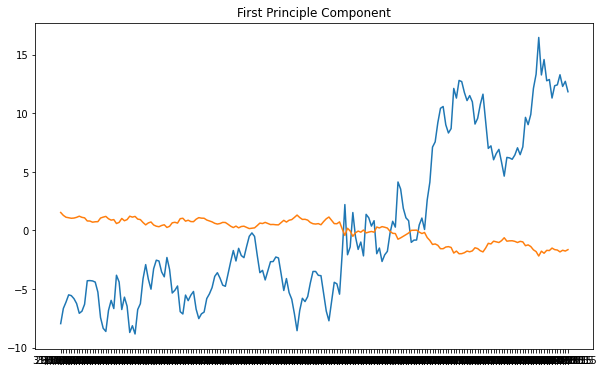

In [39]:
ax = plt.figure(figsize=(10,6))
ax = plt.plot(principal_components[0])
ax = plt.plot(df_std["10.0"])
ax = plt.title("First Principle Component")

In [49]:
# Calaculate 10Y-2M slope

df_s = df_std.copy()
df_s = df_s[["2.0","10.0"]]
df_s["slope"] = df_s["10.0"] - df_s["2.0"]
df_s.tail()

,2.0,10.0,slope
Date,,,
31/08/2015,-1.134205,-1.669821,-0.535616
30/09/2015,-1.183512,-1.828428,-0.644916
31/10/2015,-1.153928,-1.687444,-0.533516
30/11/2015,-1.158859,-1.757936,-0.599077
31/12/2015,-1.114483,-1.634575,-0.520092


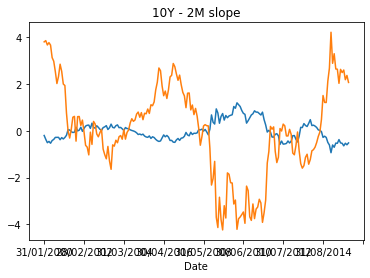

<Figure size 648x360 with 0 Axes>

In [48]:
ax = df_s.plot(y="slope", legend=False)
ax = plt.plot(principal_components[1])
ax = plt.title("10Y - 2M slope")
ax = plt.figure(figsize=(9,5))